# Linear regression, model complexity and regularization


In [4]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

X, y = make_regression(n_samples=50, n_features=1, n_informative=1, noise=50, random_state=1)

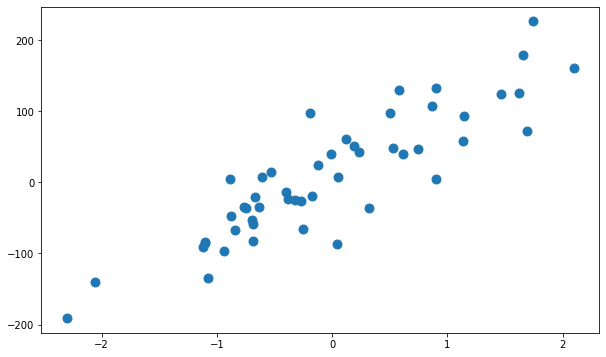

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.scatter(X, y, s=80, label='data')

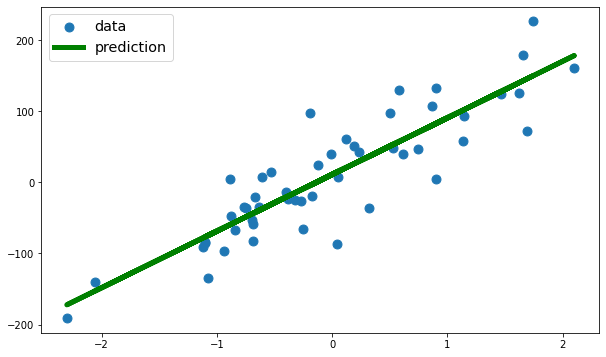

In [6]:
lr = LinearRegression().fit(X, y)

plt.figure(figsize=(10, 6))

plt.scatter(X, y, s=80, label='data')
plt.plot(X, lr.predict(X), label='prediction', c='g', linewidth=5)
plt.legend(fontsize="x-large")

## 💀 Execise 
Draw the same plot using `lr.coef_` and `lr.intercept_`

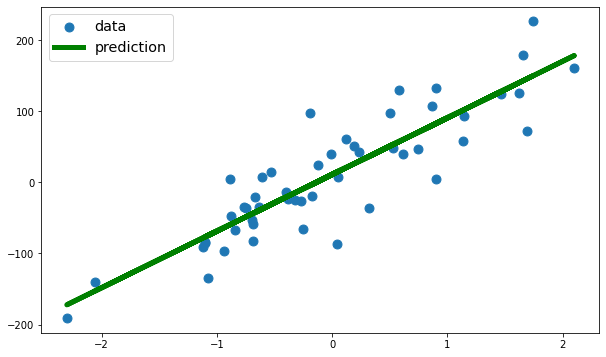

In [7]:
# lr = LinearRegression().fit(X, y)

plt.figure(figsize=(10, 6))

plt.scatter(X, y, s=80, label='data')
plt.plot(X, X*lr.coef_ + lr.intercept_, label='prediction', c='g', linewidth=5)
plt.legend(fontsize="x-large")

## Feature exapnasion

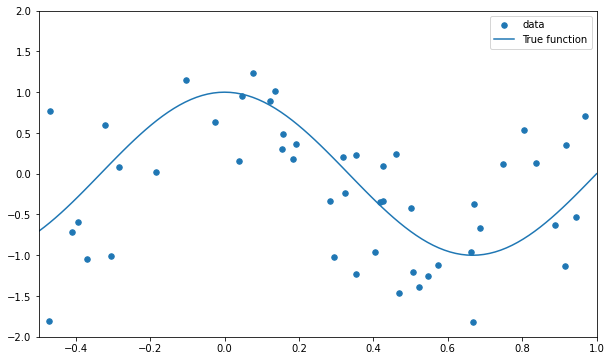

In [8]:
import numpy as np


def true_fun(X):
    return np.cos(1.5 * np.pi * X)


np.random.seed(0)

n_samples = 50
degrees = [1, 4, 15]

X = np.sort(np.random.uniform(-.5, 1, n_samples))
y = true_fun(X) + np.random.normal(0, .7, n_samples)

X_plot = np.linspace(-.5, 1, 100)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, s=30, label='data')
plt.plot(X_plot, true_fun(X_plot), label="True function")

plt.xlim((-.5, 1))
plt.ylim((-2, 2))
plt.legend()

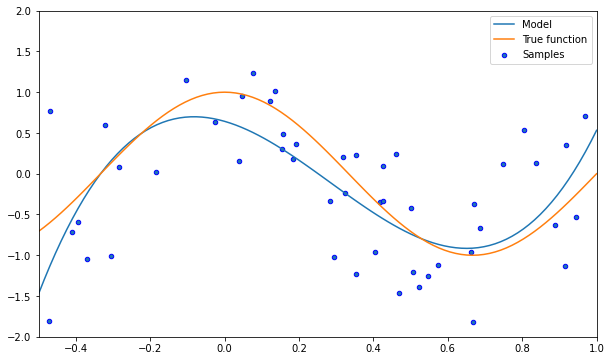

In [9]:
from sklearn.preprocessing import PolynomialFeatures

X = X.reshape(-1, 1)

polynomial_features = PolynomialFeatures(degree=3, include_bias=True)
X_expanded = polynomial_features.fit_transform(X)

model = LinearRegression().fit(X_expanded, y)
y_pred = model.predict(polynomial_features.transform(X_plot.reshape(-1, 1)))


plt.figure(figsize=(10, 6))

plt.plot(X_plot, y_pred, label="Model")
plt.plot(X_plot, true_fun(X_plot), label="True function")
plt.scatter(X, y, edgecolor="b", s=20, label="Samples")

plt.xlim((-.5, 1))
plt.ylim((-2, 2))
plt.legend()

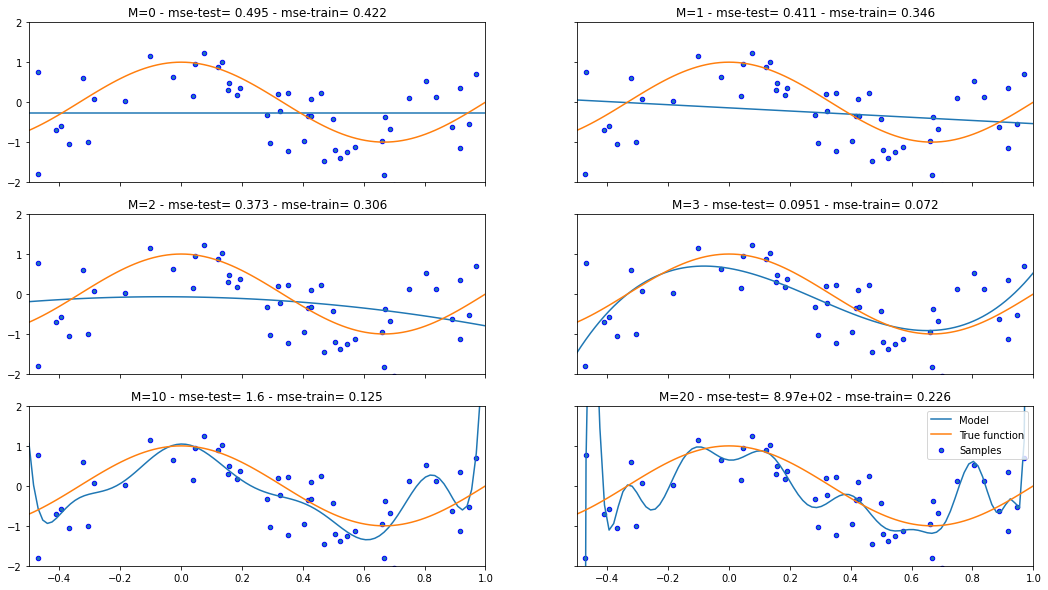

In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso

X = X.reshape(-1, 1)

_, axes = plt.subplots(3, 2, sharex=True, sharey=True, figsize=(18, 10))

model_coeficients = {}

X_test = np.linspace(-.5, 1, 20)
y_test = true_fun(X_test) + np.random.normal(0, .7, 20)

for i, d in enumerate([0, 1, 2, 3, 10, 20]):
    ax = axes[i//2, i%2]
    polynomial_features = PolynomialFeatures(degree=d, include_bias=True)
    X_expanded = polynomial_features.fit_transform(X)

    model = LinearRegression().fit(X_expanded, y)

    y_pred = model.predict(polynomial_features.transform(X_test.reshape(-1, 1)))

    mse_test = mean_squared_error(true_fun(X_test), y_pred)
    mse_train = mean_squared_error(true_fun(X), model.predict(X_expanded))
    
    model_coeficients[f"M={d}"] = model.coef_ 
    
    ax.plot(X_plot, model.predict(polynomial_features.transform(X_plot.reshape(-1, 1))), label="Model")
    ax.plot(X_plot, true_fun(X_plot), label="True function")
    ax.scatter(X, y, edgecolor="b", s=20, label="Samples")
    ax.title.set_text(f"M={d} - mse-test={mse_test: .3} - mse-train={mse_train: .3}")
    

plt.xlim((-.5, 1))
plt.ylim((-2, 2))
plt.legend()

In [11]:
import pandas as pd
pd.DataFrame(
    dict([(k, pd.Series(v)) for k, v in model_coeficients.items()])
).rename(index={i: f"w{i}" for i in range(21)})

,M=0,M=1,M=2,M=3,M=10,M=20
w0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00
w1,NaN,-0.394681,-0.081159,-1.314186,0.170300,-8.959045e-01
w2,NaN,NaN,-0.644319,-6.993895,-38.800891,6.154111e+01
w3,NaN,NaN,NaN,8.197457,11.321907,3.895278e+01
w4,NaN,NaN,NaN,NaN,472.721590,-3.991044e+03
w5,NaN,NaN,NaN,NaN,-386.617628,5.686445e+01
w6,NaN,NaN,NaN,NaN,-2574.939666,7.173385e+04
w7,NaN,NaN,NaN,NaN,3441.811529,7.068861e+03
w8,NaN,NaN,NaN,NaN,3988.046817,-6.478542e+05
w9,NaN,NaN,NaN,NaN,-8850.837064,-4.311546e+05


## 💀 Execise 

1. Plot the error function with ragard to model complexity.
2. Repeat the above experiment with Lasso and Ridge
3. Look at the coeficients and see the difference 
4. Play with the `alpha` param and see its effect

## 1. Plot the error function with ragard to model complexity.


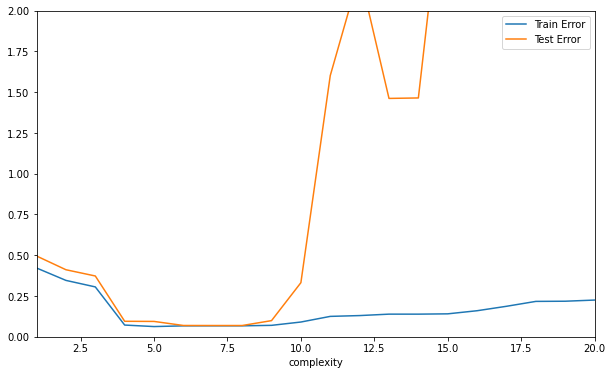

In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso

X = X.reshape(-1, 1)

train_error = []
test_error = []

X_test = np.linspace(-.5, 1, 20)
y_test = true_fun(X_test) + np.random.normal(0, .7, 20)

max_complexity = 20

for i in range(max_complexity):
    polynomial_features = PolynomialFeatures(degree=i, include_bias=True)
    X_expanded = polynomial_features.fit_transform(X)
    model = LinearRegression().fit(X_expanded, y)

    y_pred = model.predict(polynomial_features.transform(X_test.reshape(-1, 1)))

    
    mse_test = mean_squared_error(true_fun(X_test), y_pred)
    mse_train = mean_squared_error(true_fun(X), model.predict(X_expanded))

    train_error.append(mse_train)
    test_error.append(mse_test)

plt.figure(figsize=(10, 6))

plt.plot(np.linspace(1, max_complexity, max_complexity), train_error, label="Train Error")
plt.plot(np.linspace(1, max_complexity, max_complexity), test_error, label="Test Error")

plt.xlim((1, 20))
plt.ylim((0, 2))
plt.xlabel('complexity')
plt.legend()

## 2. Repeat the above experiment with Lasso and Ridge
## `Ridge`

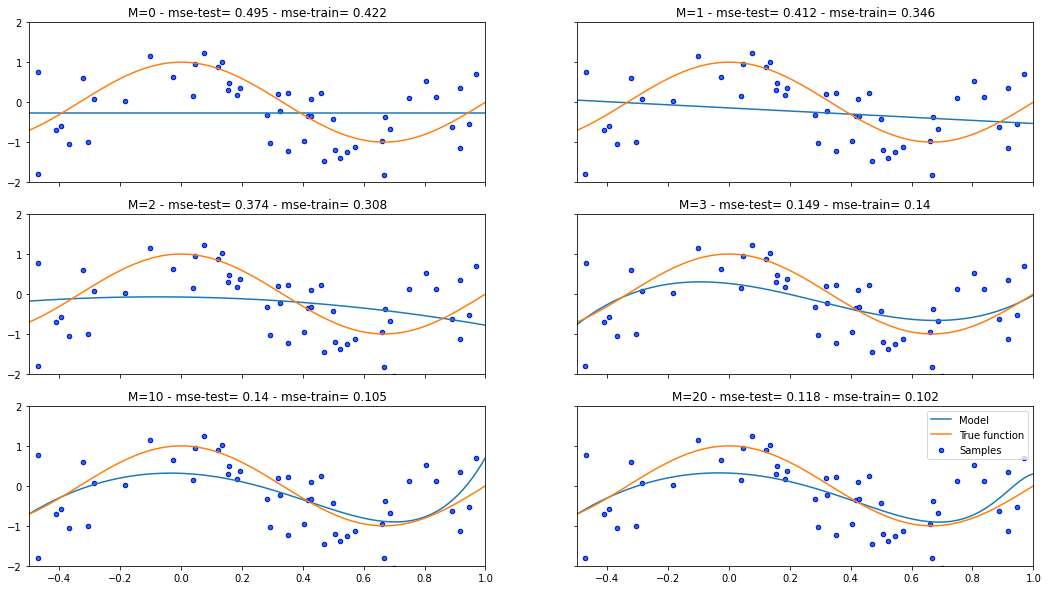

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso

X = X.reshape(-1, 1)

_, axes = plt.subplots(3, 2, sharex=True, sharey=True, figsize=(18, 10))

model_coeficients = {}

X_test = np.linspace(-.5, 1, 20)
y_test = true_fun(X_test) + np.random.normal(0, .7, 20)

for i, d in enumerate([0, 1, 2, 3, 10, 20]):
    ax = axes[i//2, i%2]
    polynomial_features = PolynomialFeatures(degree=d, include_bias=True)
    X_expanded = polynomial_features.fit_transform(X)

    model = Ridge(alpha=0.1)
#     model = LinearRegression().fit(X_expanded, y)
    model.fit(X_expanded, y)


    y_pred = model.predict(polynomial_features.transform(X_test.reshape(-1, 1)))

    mse_test = mean_squared_error(true_fun(X_test), y_pred)
    mse_train = mean_squared_error(true_fun(X), model.predict(X_expanded))
    
    model_coeficients[f"M={d}"] = model.coef_ 
    
    ax.plot(X_plot, model.predict(polynomial_features.transform(X_plot.reshape(-1, 1))), label="Model")
    ax.plot(X_plot, true_fun(X_plot), label="True function")
    ax.scatter(X, y, edgecolor="b", s=20, label="Samples")
    ax.title.set_text(f"M={d} - mse-test={mse_test: .3} - mse-train={mse_train: .3}")


plt.xlim((-.5, 1))
plt.ylim((-2, 2))
plt.legend()

## 3. Look at the coeficients and see the difference 

## `Ridge`

In **L2** Regularization bigger coefficients Decrease, **Therefore, our model cannot make strong ups and downs**, so this method protect our model from **Overfit**

If you look at the Bottom in high powers (High frequencies) like x^10 or x^20 the coefficient of High frequencies are so small

In [15]:
import pandas as pd
pd.DataFrame(
    dict([(k, pd.Series(v)) for k, v in model_coeficients.items()])
).rename(index={i: f"w{i}" for i in range(21)})

,M=0,M=1,M=2,M=3,M=10,M=20
w0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
w1,NaN,-0.390004,-0.098215,-0.803282,-0.293664,-0.283965
w2,NaN,NaN,-0.606847,-3.647346,-4.138521,-4.203063
w3,NaN,NaN,NaN,4.158776,1.241138,1.136438
w4,NaN,NaN,NaN,NaN,0.879385,0.837097
w5,NaN,NaN,NaN,NaN,1.327552,1.353847
w6,NaN,NaN,NaN,NaN,0.899701,1.008447
w7,NaN,NaN,NaN,NaN,0.601201,0.784412
w8,NaN,NaN,NaN,NaN,0.232448,0.484018
w9,NaN,NaN,NaN,NaN,-0.056885,0.253081


## 4. Play with the `alpha` param and see its effect
## `Ridge`

If alpha would be small like 0.1 or 0.2 then the Bigger coefitions of high frequencies have lower reverse effect on loos function, So our model can estimate more powerfully. (with more raise or fall)

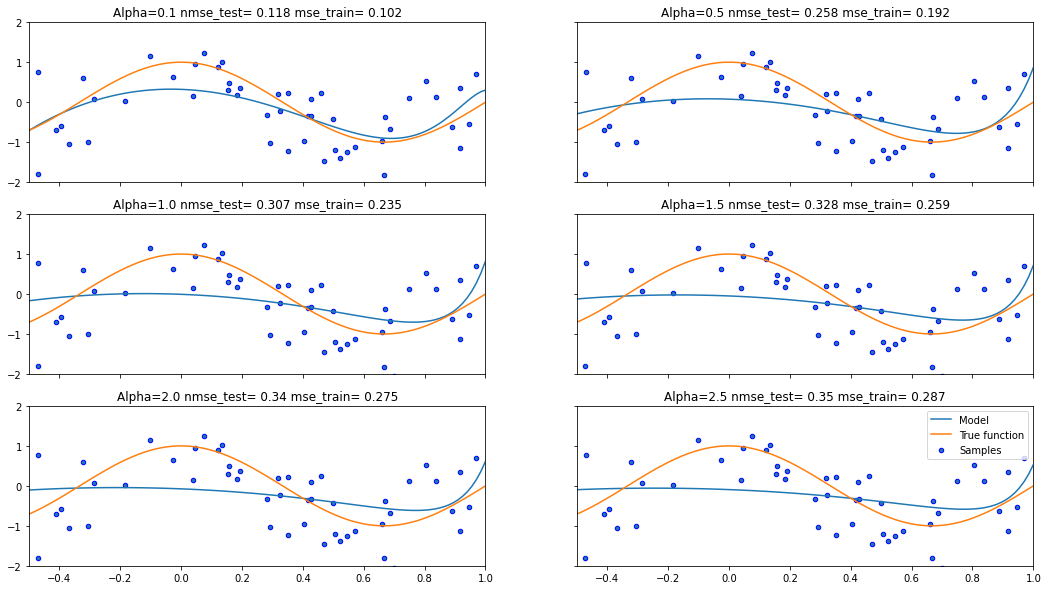

In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso

X = X.reshape(-1, 1)

_, axes = plt.subplots(3, 2, sharex=True, sharey=True, figsize=(18, 10))


X_test = np.linspace(-.5, 1, 20)
y_test = true_fun(X_test) + np.random.normal(0, .7, 20)

for i, d in enumerate([0.1, 0.5, 1.0, 1.5, 2.0, 2.5]):
    ax = axes[i//2, i%2]
    polynomial_features = PolynomialFeatures(degree=20, include_bias=True)
    X_expanded = polynomial_features.fit_transform(X)

    model = Ridge(alpha=d)
#     model = LinearRegression().fit(X_expanded, y)
    model.fit(X_expanded, y)


    y_pred = model.predict(polynomial_features.transform(X_test.reshape(-1, 1)))

    mse_test = mean_squared_error(true_fun(X_test), y_pred)
    mse_train = mean_squared_error(true_fun(X), model.predict(X_expanded))

    ax.plot(X_plot, model.predict(polynomial_features.transform(X_plot.reshape(-1, 1))), label="Model")
    ax.plot(X_plot, true_fun(X_plot), label="True function")
    ax.scatter(X, y, edgecolor="b", s=20, label="Samples")
    ax.title.set_text(f"Alpha={d} nmse_test={mse_test: .3} mse_train={mse_train: .3}")


plt.xlim((-.5, 1))
plt.ylim((-2, 2))
plt.legend()

## 2. Repeat the above experiment with Lasso and Ridge
## `Lasso`

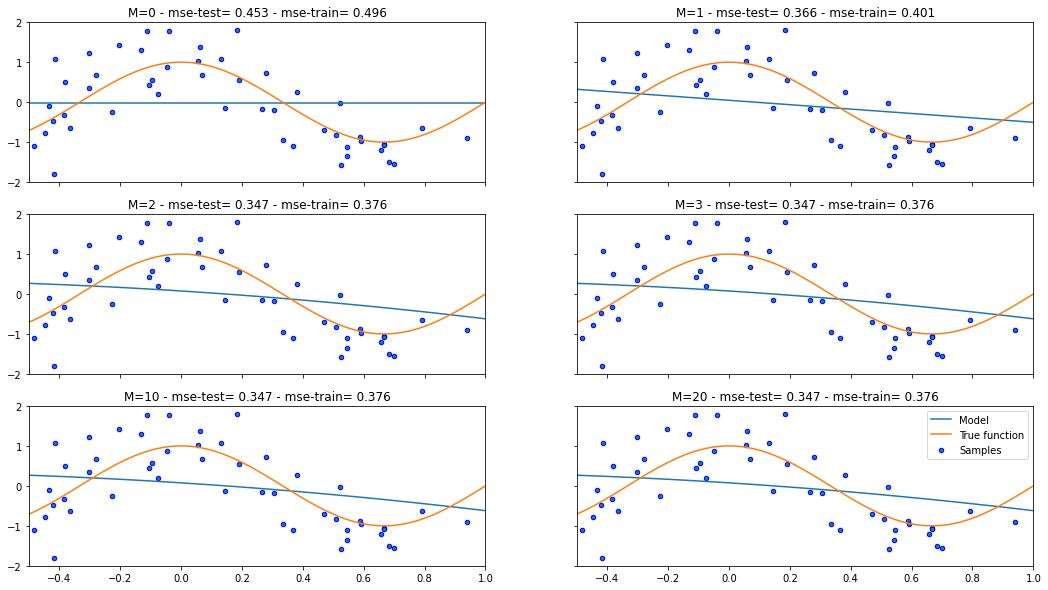

In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso

X = np.sort(np.random.uniform(-.5, 1, n_samples))
y = true_fun(X) + np.random.normal(0, .7, n_samples)

X_plot = np.linspace(-.5, 1, 100)

X = X.reshape(-1, 1)

_, axes = plt.subplots(3, 2, sharex=True, sharey=True, figsize=(18, 10))

model_coeficients = {}

X_test = np.linspace(-.5, 1, 20)
y_test = true_fun(X_test) + np.random.normal(0, .7, 20)

for i, d in enumerate([0, 1, 2, 3, 10, 20]):
    ax = axes[i//2, i%2]
    polynomial_features = PolynomialFeatures(degree=d, include_bias=True)
    X_expanded = polynomial_features.fit_transform(X)

    model = Lasso(alpha=0.1)
#     model = LinearRegression().fit(X_expanded, y)
    model.fit(X_expanded, y)


    y_pred = model.predict(polynomial_features.transform(X_test.reshape(-1, 1)))

    mse_test = mean_squared_error(true_fun(X_test), y_pred)
    mse_train = mean_squared_error(true_fun(X), model.predict(X_expanded))
    
    model_coeficients[f"M={d}"] = model.coef_ 
    
    ax.plot(X_plot, model.predict(polynomial_features.transform(X_plot.reshape(-1, 1))), label="Model")
    ax.plot(X_plot, true_fun(X_plot), label="True function")
    ax.scatter(X, y, edgecolor="b", s=20, label="Samples")
    ax.title.set_text(f"M={d} - mse-test={mse_test: .3} - mse-train={mse_train: .3}")


plt.xlim((-.5, 1))
plt.ylim((-2, 2))
plt.legend()

## 3. Look at the coeficients and see the difference 

## `Lasso`

In **L1** Regularization small coefitionts that are closer to zero, goes to zero soon. So this method used for **Feature Selection**, **every small coefitiont witch does not much efect in our model, forced to zero.** You can see many small coefitionts in L2 method forced to zero here (look at below datafreame)

In [22]:
import pandas as pd
pd.DataFrame(
    dict([(k, pd.Series(v)) for k, v in model_coeficients.items()])
).rename(index={i: f"w{i}" for i in range(21)})

,M=0,M=1,M=2,M=3,M=10,M=20
w0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
w1,NaN,-0.550348,-0.486388,-0.486388,-0.486388,-0.486388
w2,NaN,NaN,-0.209896,-0.209896,-0.209896,-0.209896
w3,NaN,NaN,NaN,-0.000000,-0.000000,-0.000000
w4,NaN,NaN,NaN,NaN,-0.000000,-0.000000
w5,NaN,NaN,NaN,NaN,-0.000000,-0.000000
w6,NaN,NaN,NaN,NaN,-0.000000,-0.000000
w7,NaN,NaN,NaN,NaN,-0.000000,-0.000000
w8,NaN,NaN,NaN,NaN,-0.000000,-0.000000
w9,NaN,NaN,NaN,NaN,-0.000000,-0.000000


## 4. Play with the `alpha` param and see its effect
## `Lasso`

If alpha value would be small like 0.1 or 0.2 then the Bigger coefitions of high frequencies have lower reverse effect on loss function, So our model can estimate more powerfully. (with more raise or fall)

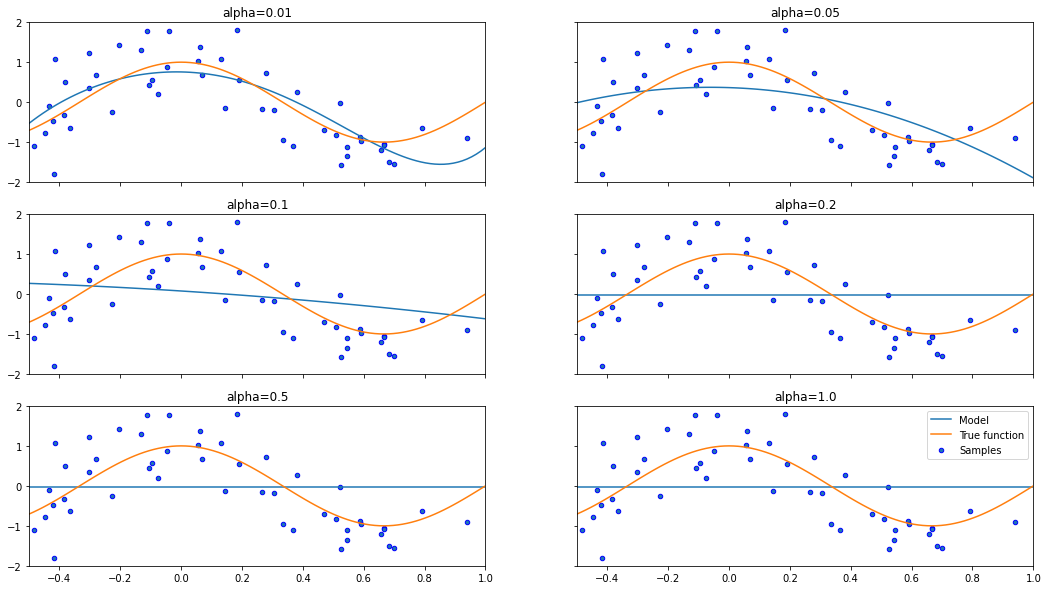

In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso

X = X.reshape(-1, 1)

_, axes = plt.subplots(3, 2, sharex=True, sharey=True, figsize=(18, 10))


X_test = np.linspace(-.5, 1, 20)
y_test = true_fun(X_test) + np.random.normal(0, .7, 20)

for i, d in enumerate([0.01, 0.05, 0.1, 0.2, 0.5, 1.0]):
    ax = axes[i//2, i%2]
    polynomial_features = PolynomialFeatures(degree=20, include_bias=True)
    X_expanded = polynomial_features.fit_transform(X)

    model = Lasso(alpha=d)
#     model = LinearRegression().fit(X_expanded, y)
    model.fit(X_expanded, y)


    y_pred = model.predict(polynomial_features.transform(X_test.reshape(-1, 1)))

    mse_test = mean_squared_error(true_fun(X_test), y_pred)
    mse_train = mean_squared_error(true_fun(X), model.predict(X_expanded))

    ax.plot(X_plot, model.predict(polynomial_features.transform(X_plot.reshape(-1, 1))), label="Model")
    ax.plot(X_plot, true_fun(X_plot), label="True function")
    ax.scatter(X, y, edgecolor="b", s=20, label="Samples")
    ax.title.set_text(f"alpha={d}")


plt.xlim((-.5, 1))
plt.ylim((-2, 2))
plt.legend()

In [25]:
from numpy import genfromtxt
from sklearn.model_selection import train_test_split

dataset = genfromtxt("data/housing.csv", delimiter=',')

X = dataset[:, :-1]
y = dataset[:, -1]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

### No regularization

In [26]:
lr = LinearRegression().fit(X_train, y_train)

print(f"Linear Regression-Training set score: {lr.score(X_train, y_train):.2f}")
print(f"Linear Regression-Test set score: {lr.score(X_test, y_test):.2f}")

Linear Regression-Training set score: 0.95
Linear Regression-Test set score: 0.61


## 💀 Execise 

1. Use ridge and lasso for the housing data and report the differnce in the scores
2. Look at the coeficients, report how ridge and lasso are different with determining coeficients

## Ridge


In [27]:
model_ri = Ridge(alpha=0.1)
model_ri.fit(X_train, y_train)

print(f"Linear Regression-Training set score: {model_ri.score(X_train, y_train):.2f}")
print(f"Linear Regression-Test set score: {model_ri.score(X_test, y_test):.2f}")

Linear Regression-Training set score: 0.93
Linear Regression-Test set score: 0.77


## Lasso

In [28]:
model_la = Lasso(alpha=0.1)
model_la.fit(X_train, y_train)

print(f"Linear Regression-Training set score: {model_la.score(X_train, y_train):.2f}")
print(f"Linear Regression-Test set score: {model_la.score(X_test, y_test):.2f}")

Linear Regression-Training set score: 0.77
Linear Regression-Test set score: 0.63


## coeficients

In [29]:

model_coeficients = {}

model_coeficients['Lasso'] = model_la.coef_
model_coeficients['Ridge'] = model_ri.coef_

import pandas as pd
df = pd.DataFrame(
    dict([(k, pd.Series(v)) for k, v in model_coeficients.items()])
).rename(index={i: f"w{i}" for i in range(21)})
df.head(20)

,Lasso,Ridge
w0,-0.000000,-2.333007
w1,0.000000,-5.441929
w2,-0.000000,-6.128655
w3,0.000000,-0.778525
w4,-0.000000,1.291530
w5,0.000000,19.022284
w6,-0.000000,4.358647
w7,-0.000000,-11.191107
w8,-0.000000,9.555397
w9,-0.000000,-0.748671


In [30]:
df.tail(10)

,Lasso,Ridge
94,-0.0,-0.779203
95,-0.0,8.564509
96,-0.0,-2.850033
97,-0.0,-13.458180
98,-0.0,3.824328
99,-0.0,-0.559662
100,-0.0,4.947479
101,0.0,2.667765
102,-0.0,-6.907626
103,0.0,24.258596
